# Given

A prerpocessed dataset (similar to MNIST) of handwritten digits from 0 to 9, decoded in a matrix 20x20 flattened into 400 attributes.

Dataset:

| Pixel 1 | Pixel 2 | Pixel 3 | ... | Pixel 400 | Label |
|---------|---------|---------|-----|-----------|-------|
|    0    |    0    |    0    | ... |    245    |   7   |
|    0    |   110   |   255   | ... |     0     |   2   |
|    0    |    23   |   255   | ... |     0     |   1   |
|    0    |    0    |    0    | ... |     0     |   0   |
|    0    |    0    |    0    | ... |     0     |   4   |
|    0    |    3    |   222   | ... |     0     |   1   |


# Find

TensorFlow model and forecast few examples


Use these TensorFlow model parameters:
   - Activation = 2x Relu, 1x Linear 
   - Optimizator = Adam(learning_rate = 0.001)
   - Loss = SparseCategoricalCrossentropy(From logits = True)
   - 2 sigmoid layers [x25->x15->x10]
   - Epochs = 40

# Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-10-26 22:37:17.525910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x = np.load("handwritten_X.npy")
y = np.load("handwritten_y.npy")

x.shape, y.shape

((5000, 400), (5000, 1))

In [8]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

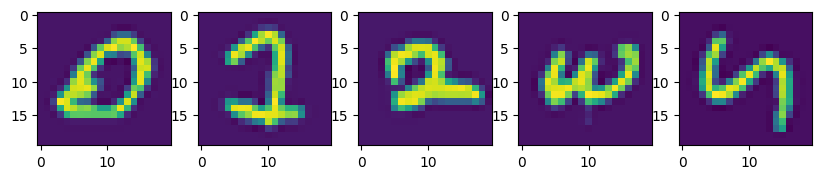

In [3]:
fig, ax = plt.subplots(1, 5, figsize=(10,2))
ax[0].imshow(x[1].reshape(20,20))
ax[1].imshow(x[2006].reshape(20,20))
ax[2].imshow(x[4610].reshape(20,20))
ax[3].imshow(x[1711].reshape(20,20))
ax[4].imshow(x[1004].reshape(20,20))

Tensorflow model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, activation="relu", input_dim=400, name="L1"),
    tf.keras.layers.Dense(units=15, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=10, activation="linear", name="L_out"),
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L_out (Dense)               (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit(x, y, 
          epochs = 10,
          verbose=False)

history.history["loss"]

[0.032930538058280945,
 0.02946946956217289,
 0.029059866443276405,
 0.02690887823700905,
 0.02542133256793022,
 0.0252376738935709,
 0.021642282605171204,
 0.020464668050408363,
 0.018313134089112282,
 0.01919241063296795]

Prediction

In [41]:
prediction = model.predict(x)
prediction_arg = np.argmax(prediction, axis=1)
prediction_vs_actual = np.c_[prediction_arg.reshape(-1,1), y]
diff = x(np.not_equal(prediction_arg.reshape(-1,1), y))
diff

157/157 [==============================] - 1s 9ms/step


TypeError: 'numpy.ndarray' object is not callable

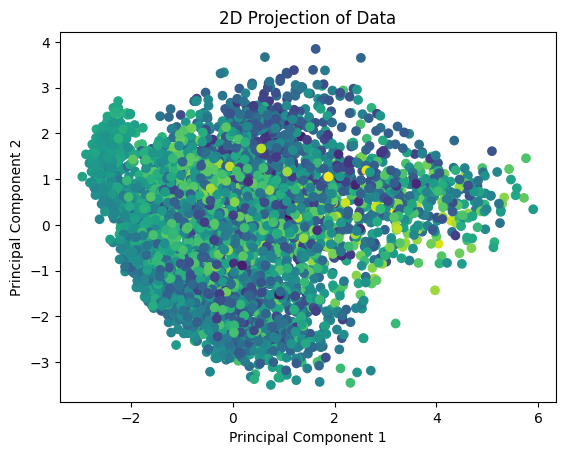

In [26]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality to 3
pca = PCA(n_components=3)
data_2d = pca.fit_transform(x)

# Plot the 2D scatterplot
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=data_2d[:,2])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Data')
plt.show()
